In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [5]:
faceBiDF = pd.read_csv("./DataFrameMaker/facebook_Bi_way.csv", sep = "\t")
faceOneDF = pd.read_csv("./DataFrameMaker/facebook_One_way.csv", sep = "\t")

In [6]:
faceBiDF

,Id,FNum,FFNum,FFNumAVG,FFNLTFN,FFNGTFN,FFNEFN
0,1,25,1928,77.120000,8,16,1
1,28,2,31,15.500000,0,2,0
2,32,5,92,18.400000,0,5,0
3,38,11,479,43.545455,2,9,0
4,50,4,69,17.250000,0,4,0
...,...,...,...,...,...,...,...
59996,45131,3,77,25.666667,1,2,0
59997,27325,9,1017,113.000000,0,9,0
59998,21169,10,387,38.700000,0,10,0
59999,48809,2,11,5.500000,0,2,0


Id는 사용자, FNum은 친구 수, FFNum은 친구의 친구 수, FFNumAVG는 FFNum의 평균, FFNLTFN은 자신의 친구들 중 자신보다 적은 친구수를 가진 친구들 수, FFNGTFN 자신의 친구들 중 자신보다 많은 친구수를 가진 친구들 수, FFNEFN, 자신의 친구들 중 자신과 같은 친구 수를 가진 친구들 수

In [5]:
sortedByFNum = faceBiDF.sort_values(by=['FNum'], axis=0)

#그래프로 친구 수 친구의 친구 수 분석

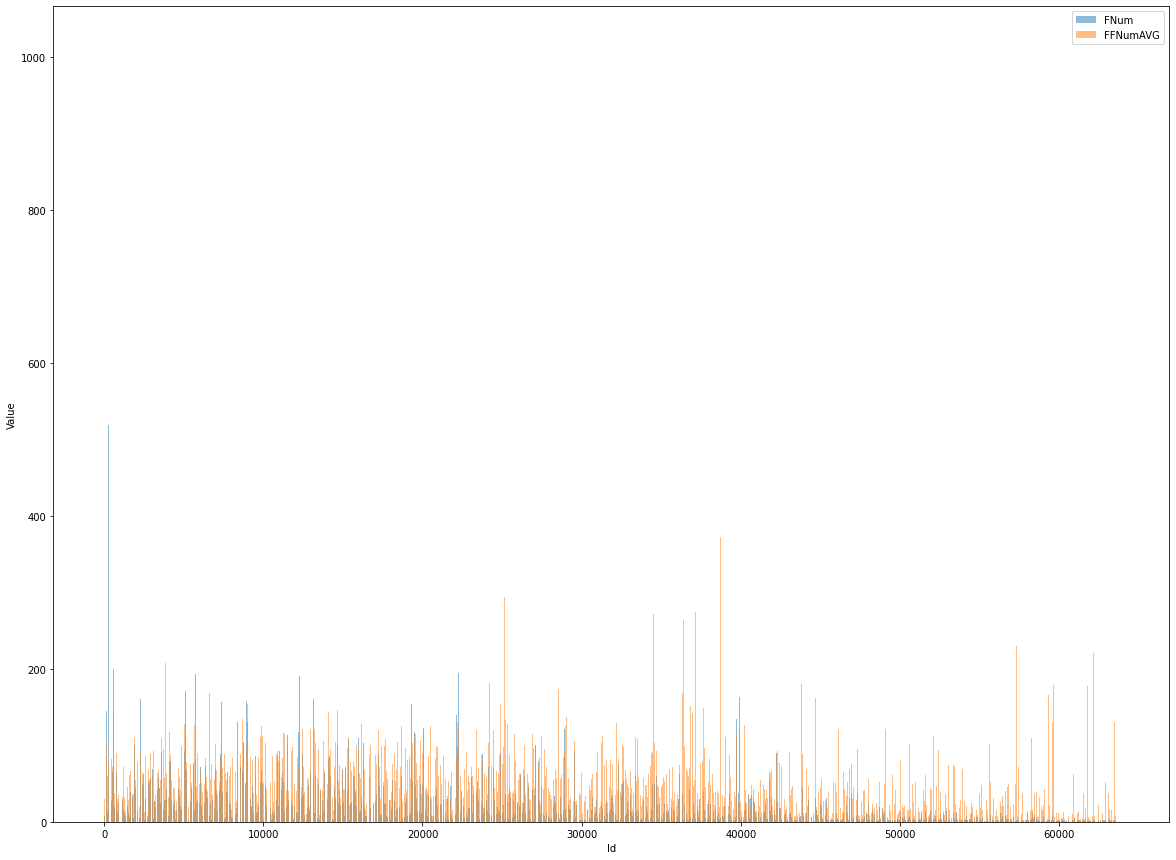

In [6]:
plt.figure(figsize=(20, 15))
plt.bar(faceBiDF.Id.values, faceBiDF.FNum.values, alpha = 0.5, label = "FNum")
plt.bar(faceBiDF.Id.values, faceBiDF.FFNumAVG.values, alpha = 0.5, label = "FFNumAVG")
plt.xlabel("Id")
plt.ylabel("Value")
plt.legend()
plt.show()

In [7]:
hist = {key: val for key, val in enumerate(np.bincount(faceBiDF.FNum.values))}

In [17]:
print(faceBiDF.Id.count(), faceBiDF.FNum.sum(), faceBiDF.FNum.sum()/faceBiDF.Id.count())

60001 1457192 24.286128564523924


In [20]:
faceBiDF.FFNum.sum()/faceBiDF.FNum.sum()

81.67944786960126

In [19]:
sum([x**2 for x in list(faceBiDF.FNum)])/faceBiDF.FNum.sum()

81.67944786960126

#혼자하는 실험 A

In [39]:
sortedByFFNGTFN = faceBiDF.sort_values(by=['FFNGTFN'], axis=0)
sortedByFFNLTFN = faceBiDF.sort_values(by=['FFNLTFN'], axis=0)

In [68]:
faceBiDF[faceBiDF.FFNGTFN > faceBiDF.FFNLTFN].FNum.mean()

14.762380982144718

In [67]:
faceBiDF[faceBiDF.FFNGTFN < faceBiDF.FFNLTFN].FNum.mean()

71.66429770012832

In [71]:
faceBiDF.FNum.mean()

24.286128564523924

#혼자하는 실험 B

In [75]:
AVGLTFN = faceBiDF[faceBiDF.FFNumAVG < faceBiDF.FNum]
AVGLTFN[AVGLTFN.FFNGTFN > AVGLTFN.FFNLTFN]

,Id,FNum,FFNum,FFNumAVG,FFNLTFN,FFNGTFN,FFNEFN
6812,5603,20,392,19.600000,8,11,1
8654,39275,4,15,3.750000,1,2,1
12858,46180,7,48,6.857143,3,4,0
19901,39107,88,7583,86.170455,43,44,1
25599,41789,6,34,5.666667,1,2,3
35009,40980,13,161,12.384615,5,6,2
42514,39748,108,11638,107.759259,51,56,1
44863,16828,10,98,9.800000,3,4,3
47656,31140,45,1968,43.733333,22,23,0


In [76]:
AVGLTFN[AVGLTFN.FFNGTFN < AVGLTFN.FFNLTFN]

,Id,FNum,FFNum,FFNumAVG,FFNLTFN,FFNGTFN,FFNEFN
11,161,45,1781,39.577778,37,8,0
17,303,47,1807,38.446809,37,9,1
33,61,33,1039,31.484848,24,7,2
44,858,91,4702,51.670330,80,11,0
75,1284,63,3448,54.730159,42,20,1
...,...,...,...,...,...,...,...
59748,34810,39,1006,25.794872,32,7,0
59750,36734,93,8170,87.849462,57,34,2
59751,48062,32,978,30.562500,20,12,0
59891,2721,46,1914,41.608696,27,18,1


In [78]:
AVGGTFN = faceBiDF[faceBiDF.FFNumAVG > faceBiDF.FNum]
AVGGTFN[AVGGTFN.FFNGTFN > AVGGTFN.FFNLTFN]

,Id,FNum,FFNum,FFNumAVG,FFNLTFN,FFNGTFN,FFNEFN
0,1,25,1928,77.120000,8,16,1
1,28,2,31,15.500000,0,2,0
2,32,5,92,18.400000,0,5,0
3,38,11,479,43.545455,2,9,0
4,50,4,69,17.250000,0,4,0
...,...,...,...,...,...,...,...
59996,45131,3,77,25.666667,1,2,0
59997,27325,9,1017,113.000000,0,9,0
59998,21169,10,387,38.700000,0,10,0
59999,48809,2,11,5.500000,0,2,0


In [79]:
AVGGTFN[AVGGTFN.FFNGTFN < AVGGTFN.FFNLTFN]

,Id,FNum,FFNum,FFNumAVG,FFNLTFN,FFNGTFN,FFNEFN
14,232,45,2926,65.022222,26,18,1
22,453,21,2265,107.857143,13,8,0
28,89,98,10102,103.081633,53,45,0
31,631,27,1432,53.037037,15,12,0
47,968,23,565,24.565217,15,7,1
...,...,...,...,...,...,...,...
59884,51341,12,177,14.750000,7,5,0
59889,811,60,4310,71.833333,30,28,2
59912,32563,79,7187,90.974684,41,38,0
59914,24277,39,2208,56.615385,21,17,1


#혼자하는 실험 C

In [82]:
sortedByFNum = faceBiDF.sort_values(by=['FNum'], axis=0)

In [100]:
length = sortedByFNum.Id.count()

In [108]:
under30 = sortedByFNum[:int(length*30/100)]

In [109]:
over30 = sortedByFNum[int(length*70/100):]

In [110]:
under30.FNum.mean()

2.066666666666667

In [111]:
under30.FFNum.sum()/under30.FNum.sum()

36.60236559139785

In [112]:
over30.FNum.mean()

63.66479640019999

In [113]:
over30.FFNum.sum()/over30.FNum.sum()

90.05623849288413

#혼자 하는 실험4

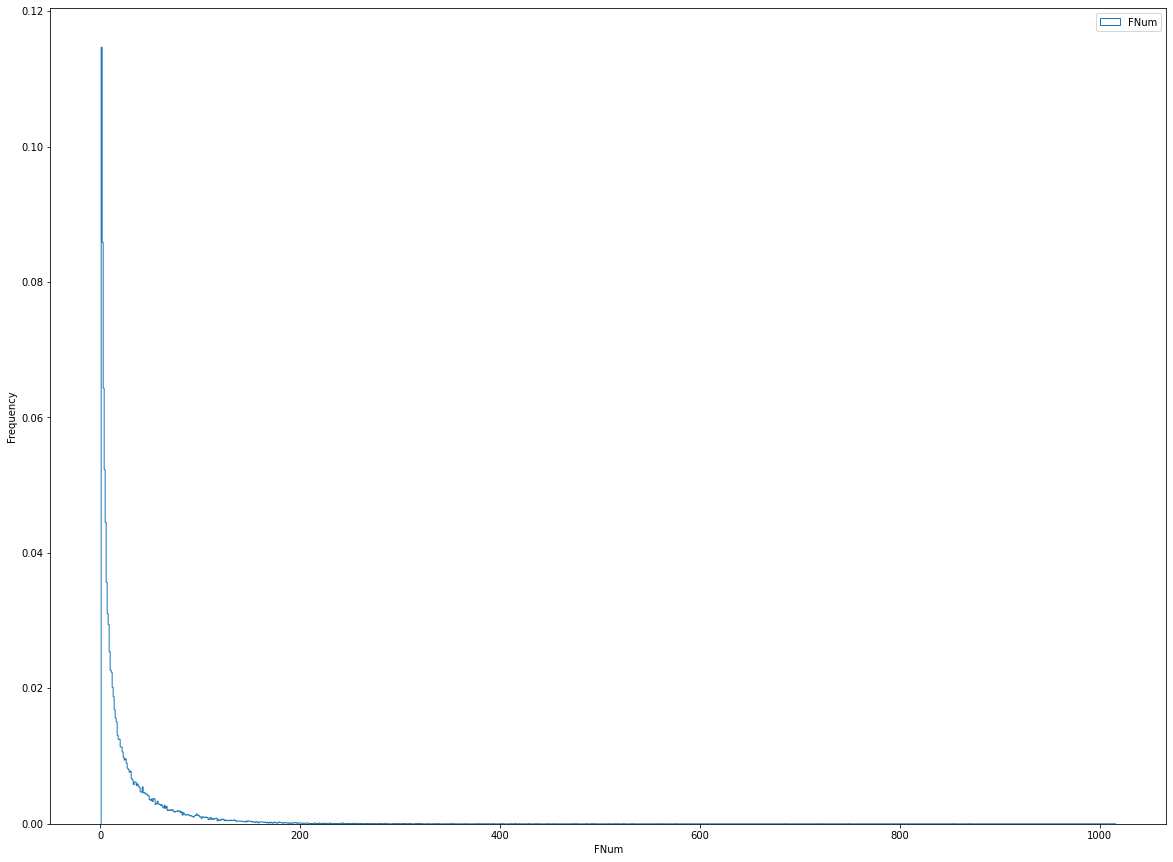

In [11]:
plt.figure(figsize=(20, 15))
plt.hist(faceBiDF.FNum, label="FNum",density = True, histtype='step', bins=range(int(faceBiDF.FNum.min()), int(faceBiDF.FNum.max())+2))
plt.xlabel("FNum")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.close()

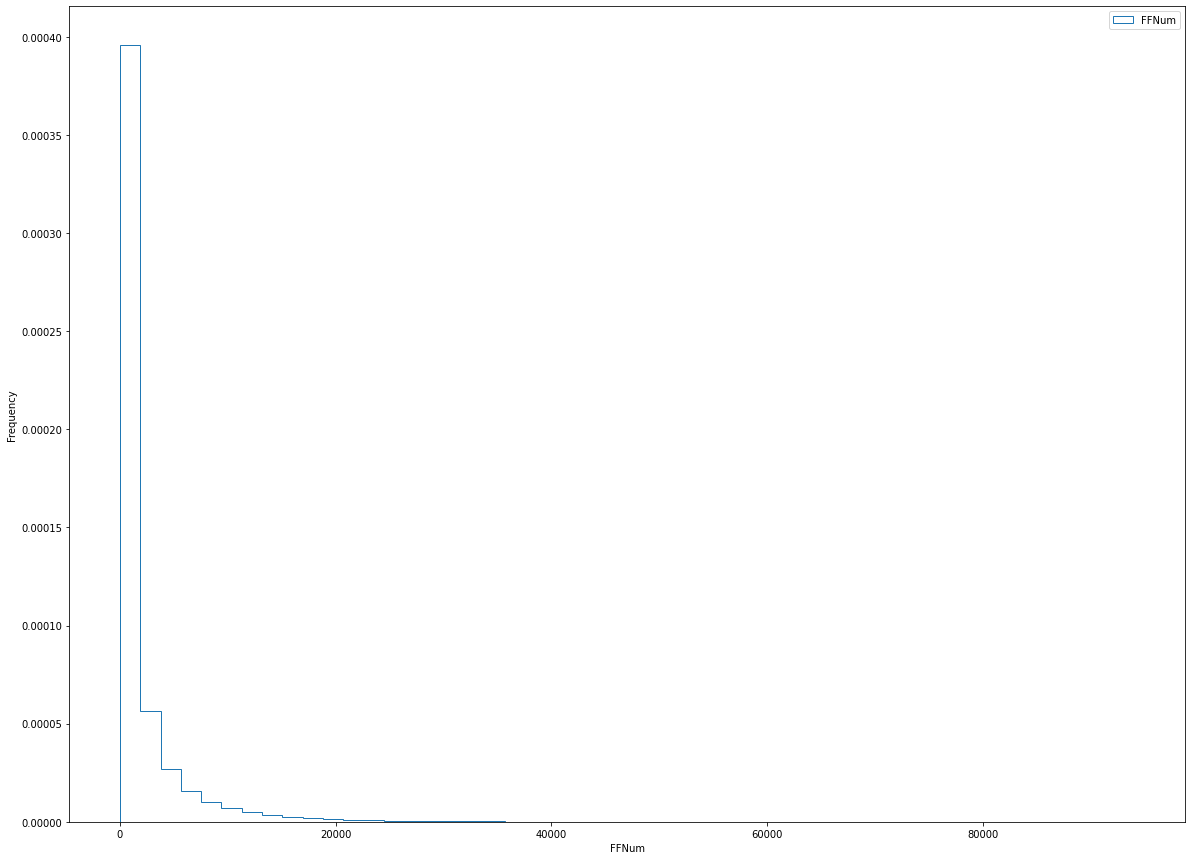

In [11]:
plt.figure(figsize=(20, 15))
#plt.hist(faceBiDF.FFNum, label="FFNum",density = True, histtype='step', bins=range(int(faceBiDF.FFNum.min()), int(faceBiDF.FFNum.max())+2))
plt.hist(faceBiDF.FFNum, label="FFNum",density = True, histtype='step', bins=50)
plt.xlabel("FFNum")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.close()

In [4]:
mean =   faceBiDF.FNum.mean()
median = faceBiDF.FNum.median()
var =    faceBiDF.FNum.var()
std =    faceBiDF.FNum.std()
print(mean, median, var, std)

24.286128564523924 10.0 1393.8847624134044 37.33476613578026


In [3]:
mean =   faceBiDF.FFNumAVG.mean()
median = faceBiDF.FFNumAVG.median()
var =    faceBiDF.FFNumAVG.var()
std =    faceBiDF.FFNumAVG.std()
print(mean, median, var, std)

54.8460598921357 45.404761904761905 1963.6820139142774 44.313451839303575


In [13]:
faceBiDF[faceBiDF["FNum"]<60].FNum.sum() / faceBiDF.FNum.sum() *100

50.69812351426579